In [24]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline
%config InlinBackend.figure_format='retina'

In [25]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [26]:
ds.air.coords


Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [27]:
# Key here is the use of dimensions and coordinates.
ds.air.lon

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [28]:
ds.coords['lon']

<xarray.DataArray 'lon' (lon: 53)>
array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [29]:
ds.air.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

In [30]:
# assign your own attributes!
ds.air.attrs["who_is_awesome"] = "xarray"
ds.air.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32),
 'who_is_awesome': 'xarray'}

In [31]:
type(ds.air.data)


numpy.ndarray

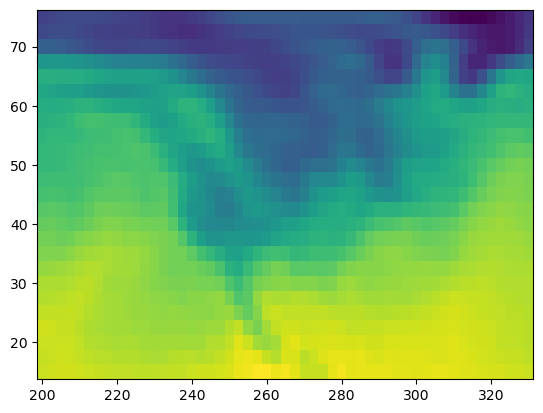

In [32]:
# plot the first timestep
lat = ds.air.lat.data  # numpy array
lon = ds.air.lon.data  # numpy array
temp = ds.air.data  # numpy array

plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :]);

In [33]:
temp[0, :, :].shape

(25, 53)

In [34]:
temp.mean(axis=2).shape

(2920, 25)

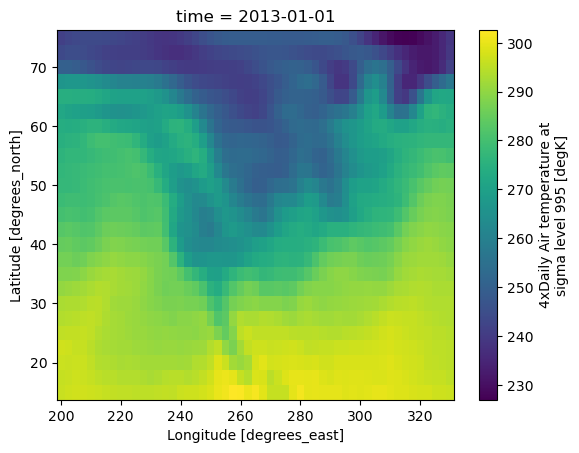

In [35]:
ds.air.isel(time=0).plot(x="lon");


In [36]:
# pull out data for all of 2013-May
ds.sel(time="2013-05")

<xarray.Dataset>
Dimensions:  (lat: 25, time: 124, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.2 259.3 259.1 ... 298.2 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [37]:
# demonstrate slicing
ds.sel(time=slice("2013-05", "2013-07"))

<xarray.Dataset>
Dimensions:  (lat: 25, time: 368, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-05-01 ... 2013-07-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 259.2 259.3 259.1 ... 299.4 299.5 299.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [38]:
# demonstrate "nearest" indexing
ds.sel(lon=240.2, method="nearest")

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    lon      float32 240.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float32 239.6 237.2 240.1 249.0 ... 294.8 296.9 298.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [39]:
# "nearest indexing at multiple points"
ds.sel(lon=[240.125, 234, 236], lat=[40.3, 50.3], method="nearest")

<xarray.Dataset>
Dimensions:  (lat: 2, time: 2920, lon: 3)
Coordinates:
  * lat      (lat) float32 40.0 50.0
  * lon      (lon) float32 240.0 235.0 235.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 268.1 283.0 283.0 ... 256.8 268.6 268.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [40]:
ds.air.data[0, 2, 3]

247.5

In [41]:
# pull out time index 0, lat index 2, and lon index 3
ds.air.isel(time=0, lat=2, lon=3)  #  much better than ds.air[0, 2, 3]

<xarray.DataArray 'air' ()>
array(247.5, dtype=float32)
Coordinates:
    lat      float32 70.0
    lon      float32 207.5
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [42]:
# Earth's average radius in meters
R = 6.371e6

# Coordinate spacing for this dataset is 2.5 x 2.5 degrees
dϕ = np.deg2rad(2.5)
dλ = np.deg2rad(2.5)

dlat = R * dϕ * xr.ones_like(ds.air.lon)
dlon = R * dλ * np.cos(np.deg2rad(ds.air.lat))

cell_area = dlon * dlat
cell_area


<xarray.DataArray (lat: 25, lon: 53)>
array([[2.0000748e+10, 2.0000748e+10, 2.0000748e+10, ..., 2.0000748e+10,
        2.0000748e+10, 2.0000748e+10],
       [2.3237628e+10, 2.3237628e+10, 2.3237628e+10, ..., 2.3237628e+10,
        2.3237628e+10, 2.3237628e+10],
       [2.6430274e+10, 2.6430274e+10, 2.6430274e+10, ..., 2.6430274e+10,
        2.6430274e+10, 2.6430274e+10],
       ...,
       [7.2616575e+10, 7.2616575e+10, 7.2616575e+10, ..., 7.2616575e+10,
        7.2616575e+10, 7.2616575e+10],
       [7.3700336e+10, 7.3700336e+10, 7.3700336e+10, ..., 7.3700336e+10,
        7.3700336e+10, 7.3700336e+10],
       [7.4643800e+10, 7.4643800e+10, 7.4643800e+10, ..., 7.4643800e+10,
        7.4643800e+10, 7.4643800e+10]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [43]:
ds.air.isel(time=1) / cell_area

<xarray.DataArray (lat: 25, lon: 53)>
array([[1.2104547e-08, 1.2134547e-08, 1.2154545e-08, ..., 1.1599567e-08,
        1.1679563e-08, 1.1789559e-08],
       [1.0482998e-08, 1.0504514e-08, 1.0508818e-08, ..., 9.9407735e-09,
        1.0005325e-08, 1.0143031e-08],
       [9.5799235e-09, 9.5681942e-09, 9.5383044e-09, ..., 8.7324104e-09,
        8.8304040e-09, 9.0237435e-09],
       ...,
       [4.0817127e-09, 4.0748271e-09, 4.0789585e-09, ..., 4.0679415e-09,
        4.0638106e-09, 4.0595416e-09],
       [4.0189776e-09, 4.0257615e-09, 4.0269832e-09, ..., 4.0108366e-09,
        4.0094799e-09, 4.0040522e-09],
       [3.9693853e-09, 3.9815764e-09, 3.9842556e-09, ..., 3.9708588e-09,
        3.9708588e-09, 3.9735384e-09]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01T06:00:00

In [44]:
# make a copy of cell_area
# then add 1e-5 degrees to latitude
cell_area_bad = cell_area.copy(deep=True)
cell_area_bad["lat"] = cell_area.lat + 1e-5  # latitudes are off by 1e-5 degrees!
cell_area_bad

<xarray.DataArray (lat: 25, lon: 53)>
array([[2.0000748e+10, 2.0000748e+10, 2.0000748e+10, ..., 2.0000748e+10,
        2.0000748e+10, 2.0000748e+10],
       [2.3237628e+10, 2.3237628e+10, 2.3237628e+10, ..., 2.3237628e+10,
        2.3237628e+10, 2.3237628e+10],
       [2.6430274e+10, 2.6430274e+10, 2.6430274e+10, ..., 2.6430274e+10,
        2.6430274e+10, 2.6430274e+10],
       ...,
       [7.2616575e+10, 7.2616575e+10, 7.2616575e+10, ..., 7.2616575e+10,
        7.2616575e+10, 7.2616575e+10],
       [7.3700336e+10, 7.3700336e+10, 7.3700336e+10, ..., 7.3700336e+10,
        7.3700336e+10, 7.3700336e+10],
       [7.4643800e+10, 7.4643800e+10, 7.4643800e+10, ..., 7.4643800e+10,
        7.4643800e+10, 7.4643800e+10]], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0

In [45]:
cell_area_bad * ds.air.isel(time=1)

<xarray.DataArray (lat: 0, lon: 53)>
array([], shape=(0, 53), dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float32 
    time     datetime64[ns] 2013-01-01T06:00:00

In [46]:
# xr.align(cell_area_bad, ds.air, join="exact")

In [47]:
# seasonal groups
ds.groupby("time.season")

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [48]:
# make a seasonal mean
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 25, season: 4, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season, lat, lon) float32 247.0 247.0 246.7 ... 299.4 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [49]:
seasonal_mean = seasonal_mean.sel(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 25, season: 4, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * season   (season) object 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    air      (season, lat, lon) float32 247.0 247.0 246.7 ... 299.4 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

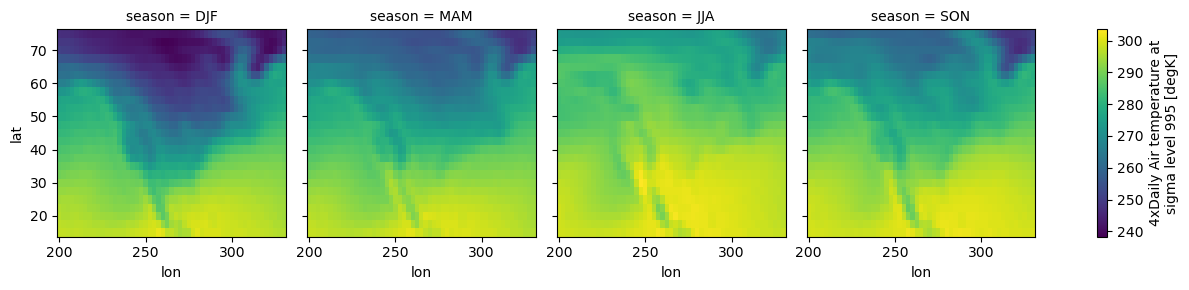

In [50]:
seasonal_mean.air.plot(col="season")

In [51]:
# resample to monthly frequency
ds.resample(time="M").mean()

<xarray.Dataset>
Dimensions:  (lat: 25, time: 24, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-31 2013-02-28 ... 2014-12-31
Data variables:
    air      (time, lat, lon) float32 244.5 244.7 244.7 ... 297.7 297.7 297.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

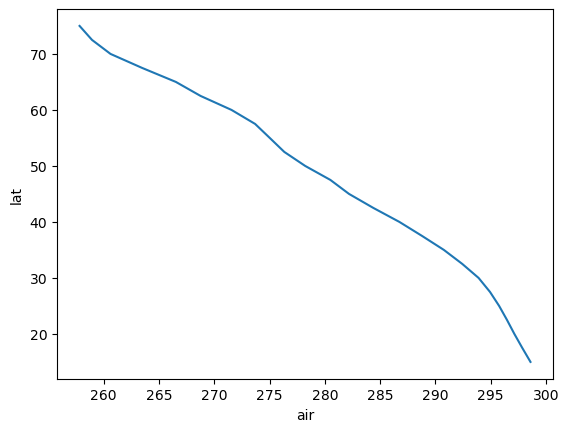

In [52]:
# weight by cell_area and take mean over (time, lon)
ds.weighted(cell_area).mean(["lon", "time"]).air.plot(y="lat");


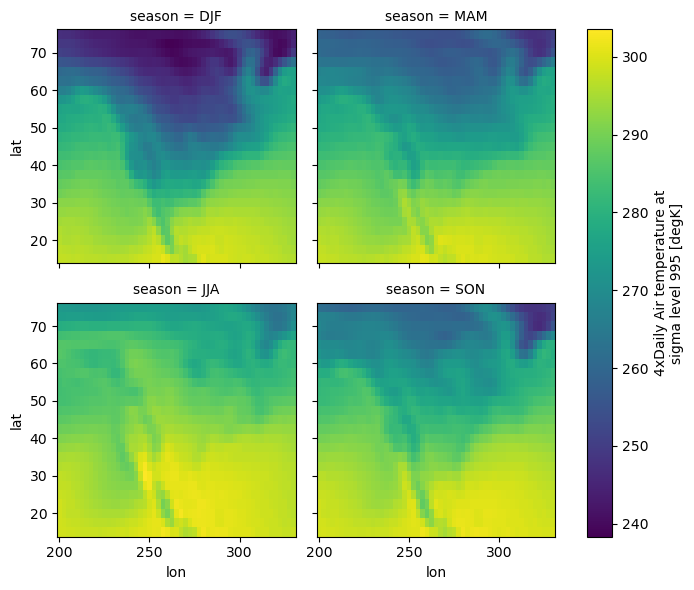

In [53]:
# facet the seasonal_mean
seasonal_mean.air.plot(col="season", col_wrap=2);

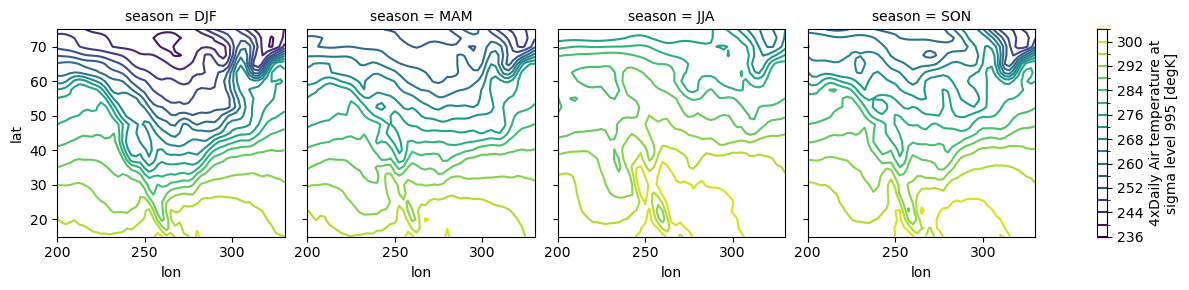

In [54]:
# contours
seasonal_mean.air.plot.contour(col="season", levels=20, add_colorbar=True);

In [55]:
# write to netCDF
ds.to_netcdf("my-example-dataset.nc")

/tmp/ipykernel_19460/1659397704.py:2: SerializationWarning: saving variable air with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds.to_netcdf("my-example-dataset.nc")


In [56]:
# read from disk
fromdisk = xr.open_dataset("my-example-dataset.nc")
fromdisk

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [57]:
# check that the two are identical
ds.identical(fromdisk)

True

In [58]:
# convert to pandas dataframe
df = ds.isel(time=slice(10)).to_dataframe()
df

air
lat  time                lon              
75.0 2013-01-01 00:00:00 200.0  241.199997
                         202.5  242.500000
                         205.0  243.500000
                         207.5  244.000000
                         210.0  244.099991
...                                    ...
15.0 2013-01-03 06:00:00 320.0  297.000000
                         322.5  297.290009
                         325.0  296.899994
                         327.5  296.790009
                         330.0  297.100006

[13250 rows x 1 columns]

In [59]:
# convert dataframe to xarray
df.to_xarray()

<xarray.Dataset>
Dimensions:  (lat: 25, time: 10, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-01-03T06:00:00
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Data variables:
    air      (lat, time, lon) float32 241.2 242.5 243.5 ... 296.9 296.8 297.1

In [60]:
import hvplot.xarray

ds.air.hvplot(groupby="time", clim=(270, 300), widget_location='bottom')

BokehModel(combine_events=True, render_bundle={'docs_json': {'235a1f97-f385-41dc-8ec9-1b81aa2b7bfa': {'version…

In [61]:
import cf_xarray

# describe cf attributes in dataset
ds.air.cf

Coordinates:
             CF Axes: * X: ['lon']
                      * Y: ['lat']
                      * T: ['time']
                        Z: n/a

      CF Coordinates: * longitude: ['lon']
                      * latitude: ['lat']
                      * time: ['time']
                        vertical: n/a

       Cell Measures:   area, volume: n/a

      Standard Names: * latitude: ['lat']
                      * longitude: ['lon']
                      * time: ['time']

              Bounds:   n/a

       Grid Mappings:   n/a

In [62]:
# demonstrate equivalent of .mean("lat")
ds.air.cf.mean("latitude")

<xarray.DataArray 'air' (time: 2920, lon: 53)>
array([[279.39798, 279.6664 , 279.66122, ..., 279.9508 , 280.31522,
        280.6624 ],
       [279.05722, 279.538  , 279.7296 , ..., 279.77563, 280.27002,
        280.79764],
       [279.0104 , 279.2808 , 279.5508 , ..., 279.682  , 280.19763,
        280.81403],
       ...,
       [279.63   , 279.934  , 280.534  , ..., 279.802  , 280.346  ,
        280.77798],
       [279.398  , 279.66602, 280.31796, ..., 279.766  , 280.34198,
        280.834  ],
       [279.27   , 279.354  , 279.88202, ..., 279.42596, 279.96997,
        280.48196]], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

In [63]:
# demonstrate indexing
ds.air.cf.sel(longitude=242.5, method="nearest")

<xarray.DataArray 'air' (time: 2920, lat: 25)>
array([[241.     , 238.     , 239.7    , ..., 292.     , 293.9    ,
        296.79   ],
       [240.     , 238.39   , 241.09999, ..., 292.6    , 294.1    ,
        296.69998],
       [240.7    , 238.89   , 240.79999, ..., 292.29   , 293.4    ,
        296.1    ],
       ...,
       [241.79   , 243.48999, 246.48999, ..., 294.69   , 296.69   ,
        298.49   ],
       [239.89   , 241.68999, 242.29   , ..., 295.09   , 296.88998,
        298.59   ],
       [239.59   , 241.48999, 240.79   , ..., 295.19   , 296.79   ,
        298.88998]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    lon      float32 242.5
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray